# Sesión 13
> Por Christian Rubio Montiel (CRM)
Implementación por Josue Río Campos Becerra, Moisés Borjan Ramírez, Oscar David Domínguez Dávila, Luis Ramos Guerrero y Kevin Martin Rivera Castro y CRM.

En esta sesión se analiza la cota inferior al problema de ordenación y se da otra solución mediante el algoritmo Counting Sort asumiendo información extra.

<a id='indice'></a>
### Índice
---
1. **[Cota Inferior](#Cota)**
2. **[COUNTING-SORT](#counting-sort)**
3. **[Experimentación](#experimentacion)**
4. **[Referencias](#referencias)**
---

Dado un arreglo arbitrario $A$, ¿podremos garantizar ordenarlo en tiempo $o(n\lg(n))$? Resulta que si no tenemos más que la herramienta de comparar elementos pero ninguna información extra, entonces no.

<a id='Cota'></a>
## 1. COTA INFERIOR

Definamos una gráfica donde los vértices son todas las posibles permutaciones de $n$ elementos y dos de ellos son adyacentes si se puede obtener uno de ellos mediante una transposición de dos elementos del otro.

Los vértices de esta gráfica son el dominio de nuestro algoritmo de comparación, o mejor dicho, los vértices son *el espacio de búsqueda*. Nuestro algorimo de comparación será un árbol de decisión, el cual tendrá altura, en el mejor de los casos $\Omega(\lg(n!))$.

$\lg(n!)=\lg(1)+\lg(2)+...+\lg(n)=\sum_{i=1}^{n}\lg(i)\sim \int_{1}^{n}\lg(x)dx=x\lg(x)-x\mid_1^n=n\lg(n)-n+1=\theta(n\lg(n)).$

Entonces, podemos concluir que cualquier algoritmo de comparación tendrá tiempo de ejecución $\Omega(n\lg(n))$ en el peor de los casos.


En general, hallar la cota inferior de un algoritmo que resuelva un problema resulta ser difícil. Por ejemplo, el algoritmo de multiplicar dos números naturales de $n$ dígitos que usamos comúnmente requiere $\theta(n^2)$ pasos. En este [video](https://youtu.be/ulBEE30G3SE) explican el algoritmo de Karatsuba que requiere $\theta(n^{\lg(3)})$ pasos. Al día de hoy, se conocen algoritmos que requieren $\theta(n\lg(n))$ pasos pero no se tiene una cota inferior del mismo orden, por lo que se podría mejorar.

En el caso de multiplicar matrices, el algoritmo más común de multiplicar dos matrices de $n\times n$ requiere $\theta(n^3)$ pasos, puede hallar un seudocódigo en el libro de Cormen. En esta [nota](https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/) hacen un listado histórico de las mejoras en el tiempo de ejecución, que para 2021 el algoritmo más eficiente tiene un tiempo de $O(n^{2.3728596})$.

Reciéntemente, en 2022, se hizo uso de inteligencia artificial para determinar cómo dividir las matrices realizando mejoras en multiplicación de matrices de $4\times 4$, $5\times 5$, ver [liga](https://www.nature.com/articles/s41586-022-05172-4).

En el libro de Cormen mencionan que "En una ordenación de **comparación**, utilizamos sólo **comparaciones** entre elementos para obtener información de orden sobre una secuencia de entrada. No podemos inspeccionar los valores de los elementos ni obtener información de orden sobre ellos de ninguna otra manera". "En los algoritmos con **información extra** podremos **asumir información** acerca de los elementos en un arreglo, asi que usaremos esta **información** para generar algoritmos de ordenación **más eficientes**."

Regresar al **[Índice](#indice)**.

<a id='counting-sort'></a>
   ## 2. COUNTING-SORT

El algoritmo de Counting Sort asume que sus entradas son números naturales y que están delimitados, es decir, que la entrada es una sucesión son naturales que van de $0$ a un elemento dado $k$.

El algoritmo de Counting Sort tiene una complejidad $\theta(n+k)$, es decir, depende de la variable $k$; si esta es lineal entonces el algoritmo es lineal.

Entonces, la entrada es un arreglo $A[1..n]$ con $n=length(A)$ y la salida es otro arreglo $B[1..n]$, donde se copia la información de $A$ en el orden buscado. Se requiere de un arreglo auxiliar $C[0..k]$.

*COUNTING-SORT($A$,$k$)*
1. let $B[1..n]$ be a new array
2. **for** $i=1$ to $n$ **do**
3. $\hspace{0.5cm}B[i]=0$
4. let $C[0..k]$ be a new array
5. **for** $i=0$ to $k$ **do**
6. $\hspace{0.5cm}C[i]=0$
7. **for** $j=1$ to $n$ **do**
8. $\hspace{0.5cm}C[A[j]]=C[A[j]]+1$
9. **for** $i=1$ to $k$ **do**
10. $\hspace{0.5cm}C[i]=C[i]+C[i-1]$
11. **for** $j=n$ downto $1$ **do**
12. $\hspace{0.5cm}B[C[A[j]]]=A[j]$
13. $\hspace{0.5cm}C[A[j]]=C[A[j]]-1$

El tiempo de ejecución es fácil de deducir, ya que depende de ciclos **for**, las líneas 5-6 y 9-10 tienen un tiempo de $\theta(k)$ mientras que las líneas 2-3, 7-8 y 11-13 tienen un tiempo de $\theta(n)$, el resto de líneas son de tiempo constante.

Para ver que el algoritmo es correcto, primero veamos el ciclo **for** de la línea 7. Lo que ejecuta es contar los elementos de $A$. Entonces, incrementar en $1$ la entrada $l$ de $C$ si la entrada $j$ de $A$ tiene el elemento $l$.

Luego, el ciclo **for** de la línea 9 hace una suma acumulada en los elementos de $C$.

Finalmente, el ciclo **for** de la línea 11 va llenando los elementos de $B$ con los elementos de la suma acumulada de $C$, iniciando con el índice mayor de $A$ (esto permite llevar un orden donde coloca los elementos repetidos de $A$ en la misma secuencia que aparecen, a lo que se le denomina *algoritmo estable*) posteriormente, reduce en 1 la suma acumulada ya que colocó uno de los elementos.

In [1]:
function COUNTING_SORT(A,k)
    B = vec(zeros(Int,length(A)))
    C = vec(zeros(Int,k+1))
    for j in 1:length(A)
        C[A[j]+1] = C[A[j]+1]+1
    end
    for i in 2:k+1
        C[i] = C[i] + C[i-1]
    end
    for j in length(A):-1:1
        B[C[A[j]+1]] = A[j]
        C[A[j]+1] = C[A[j]+1]-1
    end
    return B
end

COUNTING_SORT (generic function with 1 method)

Aquí, conviene hecer un ejemplo donde se ejecute línea a línea el algoritmo. Considere $A=[2,5,3,0,2,3,0,3]$ y pida a los alumnos que le vayan diciendo los pasos a seguir.

In [2]:
A = [2,5,3,0,2,3,0,3]
k = maximum(A)
COUNTING_SORT(A,k)

8-element Vector{Int64}:
 0
 0
 2
 2
 3
 3
 3
 5

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
## 3. Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 100000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

Graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos.

In [3]:
using Plots

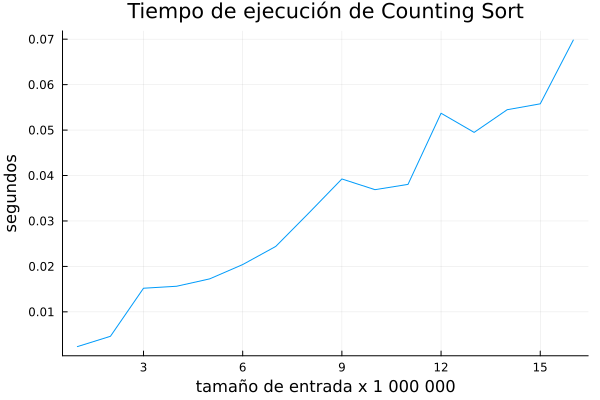

In [4]:
y = []
for j in 1:16
    Aj = rand(1:1000,1000000*j) #o también Aj = round.(Int,rand(1000000*j).*1000)
push!(y,@elapsed COUNTING_SORT(Aj,1000))
end

x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 1 000 000")
yaxis!("segundos")
title!("Tiempo de ejecución de Counting Sort")

De acuerdo a nuestro análisis, el tiempo de Counting Sort, es lineal, así que ahora ajustaremos una curva lineal vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

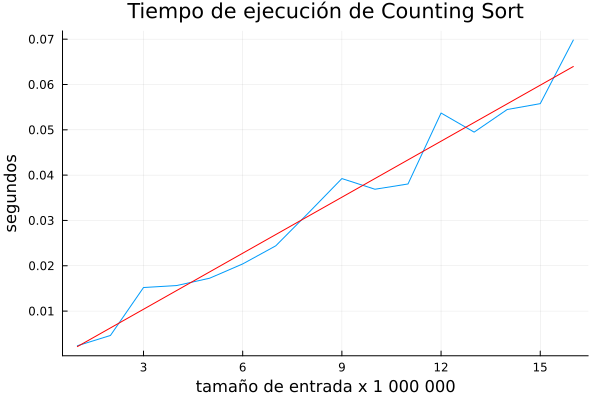

In [5]:
M = zeros(Int64, 2, 2)
M[1, 1] = 16
M[1, 2] = sum(x)
M[2, 1] = sum(x)
M[2, 2] = sum(x .^ 2)
S=M^(-1)*[sum(y), sum(y.*x)]

P(x) =  S[1]+S[2]*x

w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 4. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.